In [ ]:
#pip install keras.utils

In [ ]:
import numpy
from keras.utils import to_categorical
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
from PIL import Image
from keras.datasets import cifar10

Были загружены данные из набора MNIST. Было вызуиализировано 4 изображения из тренировочного набора и 4 изображения из валидационного набора.

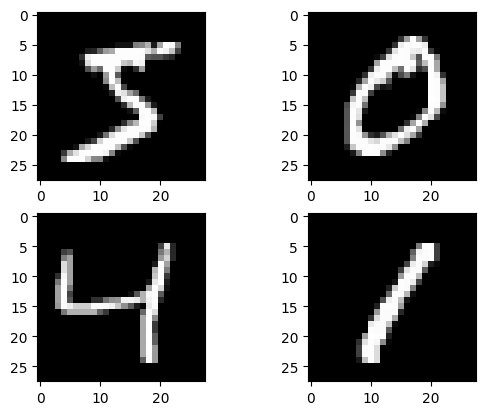

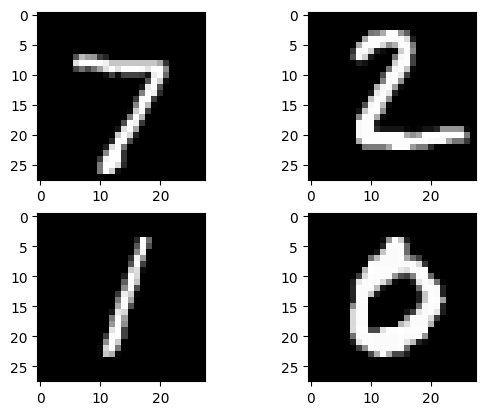

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data() # загрузка данных

plt.subplot(2,2,1)
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,2)
plt.imshow(X_train[1],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,3)
plt.imshow(X_train[2],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,4)
plt.imshow(X_train[3],cmap=plt.get_cmap('gray'))

plt.show()

plt.subplot(2,2,1)
plt.imshow(X_test[0],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,2)
plt.imshow(X_test[1],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,3)
plt.imshow(X_test[2],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,4)
plt.imshow(X_test[3],cmap=plt.get_cmap('gray'))

plt.show()

Данный набор данных содержит в себе изображения цифр и массив с цифрами как целевой признак. Учебный набор данных представлен в виде трехмерных массивов.

Чтобы провести предобработку данных необходимо представить этот массив в виде одномерного, т.к. каждый пиксель - отдельный входной признак.

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) # shape 0 для того чтобы получился массив размером (длина X_train, кол-во пикселей)
X_test = X_test.reshape(X_test.shape[0],num_pixels)

In [ ]:
X_train.shape

(60000, 784)

Значения пикселей заданы в диапазоне от 0 до 255. Для эффективного обучения нейронной сети необходимо масштабировать входные значения. Для этого нормализуем значения пикселей в диапозон от 0 до 1, разделив каждое значение на 255.


In [ ]:
X_train = X_train/255
X_test = X_test/255

Выодное значение - целое число от 0 до 9. Это задача классификации с несколькими классами. Необходимо преобразовать метки классов в формат, который нейронная сеть сможет "понять", с помощью np_utils.to_categorical() можно создать двоичные матрицы.

In [ ]:
y_train = to_categorical(y_train) # подготовка к квалицифкации - вектор, в котором на месте определенного класа единица
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)
print(y_test.shape)
y_train.shape

10
(10000, 10)


(60000, 10)

Необходимо создать полносвязну модель с двумя слоями. На входном слое будет использоваться линейная функция активации, на выходном - softmax. Функция потерь - categorical_crossentropy - функция потерь для многоклассовой классификации.

In [ ]:
model = Sequential()
model.add(Dense(64,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
history = model.fit(X_train,y_train, validation_data = (X_test, y_test),epochs = 20, batch_size = 200, verbose = 2)
history_df = pd.DataFrame(history.history)

Epoch 1/20
300/300 - 2s - loss: 0.4734 - accuracy: 0.8694 - val_loss: 0.2974 - val_accuracy: 0.9159 - 2s/epoch - 7ms/step
Epoch 2/20
300/300 - 1s - loss: 0.2966 - accuracy: 0.9161 - val_loss: 0.2756 - val_accuracy: 0.9242 - 795ms/epoch - 3ms/step
Epoch 3/20
300/300 - 1s - loss: 0.2805 - accuracy: 0.9207 - val_loss: 0.2676 - val_accuracy: 0.9250 - 892ms/epoch - 3ms/step
Epoch 4/20
300/300 - 1s - loss: 0.2724 - accuracy: 0.9238 - val_loss: 0.2700 - val_accuracy: 0.9229 - 791ms/epoch - 3ms/step
Epoch 5/20
300/300 - 1s - loss: 0.2663 - accuracy: 0.9255 - val_loss: 0.2709 - val_accuracy: 0.9235 - 816ms/epoch - 3ms/step
Epoch 6/20
300/300 - 1s - loss: 0.2619 - accuracy: 0.9271 - val_loss: 0.2755 - val_accuracy: 0.9238 - 756ms/epoch - 3ms/step
Epoch 7/20
300/300 - 1s - loss: 0.2588 - accuracy: 0.9285 - val_loss: 0.2724 - val_accuracy: 0.9228 - 815ms/epoch - 3ms/step
Epoch 8/20
300/300 - 1s - loss: 0.2575 - accuracy: 0.9284 - val_loss: 0.2693 - val_accuracy: 0.9260 - 820ms/epoch - 3ms/step
Epo

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.473449,0.869367,0.297382,0.9159
1,0.296616,0.916133,0.275552,0.9242
2,0.280539,0.920700,0.267644,0.9250
3,0.272370,0.923850,0.269990,0.9229
4,0.266279,0.925450,0.270853,0.9235
5,0.261861,0.927133,0.275518,0.9238
6,0.258830,0.928517,0.272431,0.9228
7,0.257457,0.928367,0.269251,0.9260
8,0.253845,0.929933,0.268493,0.9268
9,0.251622,0.930783,0.270655,0.9250


Далее необходимо вывести classification_report И confusion_matrix

In [ ]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis = 1)
y_test_argmax = np.argmax(y_test,axis = 1)
print("Classification Report: ")
print(classification_report(y_test_argmax,predictions))
# support - количество примеров каждого класса в наборе данных
# F1 score - гармоническое среднее точности и плотности
# recall -  полнота - отношение правильно классифицированных положительных примеров к общему количеству фактических положительных примеров
# precision - отношение правильно классифицированных положительных примеров к общему количеству классифицированных как положительные

313/313 [==============================] - 1s 2ms/step
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.93      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.92      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [ ]:
print("Confusion_matrix")
print(confusion_matrix(y_test_argmax, predictions))

Confusion_matrix
[[ 963    0    0    2    2    5    5    2    1    0]
 [   0 1114    3    2    0    1    4    2    9    0]
 [   7    8  924   15   10    5   14   11   35    3]
 [   4    1   18  918    0   24    5    9   24    7]
 [   1    3    4    2  915    0   13    5    8   31]
 [  10    4    2   35    8  775   18   10   25    5]
 [  10    3    4    2    7   16  913    1    2    0]
 [   1    4   23    5    5    2    0  958    3   27]
 [   9   12    4   19    8   28   14   13  856   11]
 [  10    8    1    8   26    8    0   22    6  920]]


По classification_report и confussion matrix можно сделать выводы о том, что:


*   Высокие значения precision говорят о том, что количество правильно классифицированных положительных примеров крайне высоко
*   Высокие значения recall говорят о том, что модель классифицирует большую часть положительных наблюдей верно, т.е. модель успешно классифицирует большинство наблюдений для каждого класса


*   Высокие значения F1-Score говорит о маленькой разницей между precission и recall
*   Т.к. на главной диагонали confussion matrix распологаются высокие значения, можно сделать вывод о том, что модель верно классифицирует большинство значений





Необходимо построить график потерь и точности обучения по эпохам для данной модели. Для данной цели была создана функция ploting, которая выводит график зависимости потерь от эпохи и график зависимости точности от эпохи

In [ ]:
def ploting(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  plt.title("График потерь")
  plt.plot(train_loss,label = 'train_loss')
  plt.plot(val_loss, label = 'val_loss', color = 'r')
  plt.xlabel("Эпоха")
  plt.ylabel("Значение")
  plt.grid()
  plt.legend()
  plt.show()

  plt.title("График точности")
  plt.plot(train_accuracy,label = 'train_accuracy')
  plt.plot(val_accuracy, label = 'val_accuracy', color = 'r')
  plt.xlabel("Эпоха")
  plt.ylabel("Значение")
  plt.grid()
  plt.legend()
  plt.show()

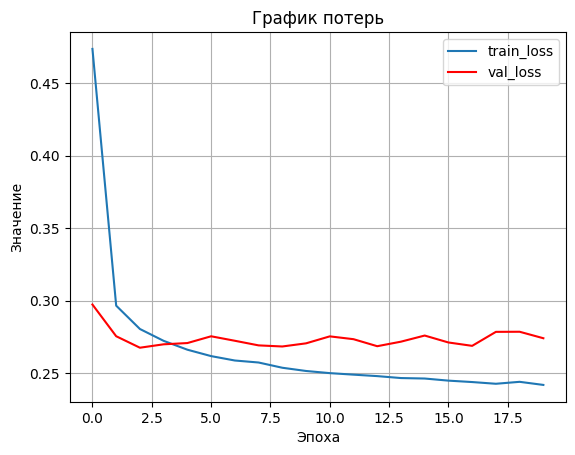

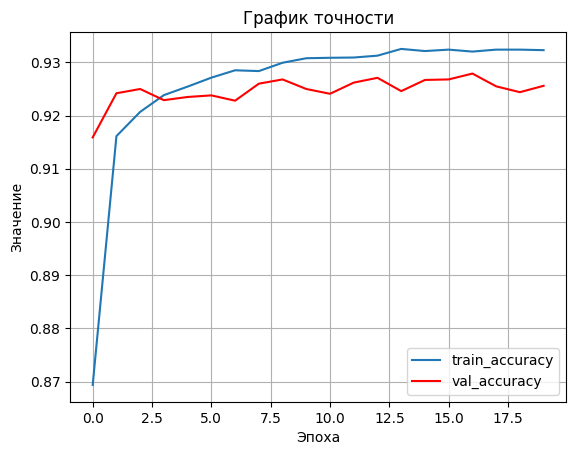

In [ ]:
ploting(history)

По данным графикам можно сделать вывод о том, что значение потерь резко уменьшается с 1 по 3 эпохи, что говорит о том, что в этот момент модель обучается, затем график сглаживается. Значение точности же резко возрастает с 1 по 3 эпохи, что также говорит о том, что в этот период модель обучается.

# **Нелинейная функция активации**

Необходимо повторить данный эксперимент с другой архитектурой НС, а именно - изменить функцию активации на нелинейную. Отличие linear от sigmoid в том, что при использовании sigmoid значения получаются от 0 до 1, в случае с Linear от 0 до бесконечности.

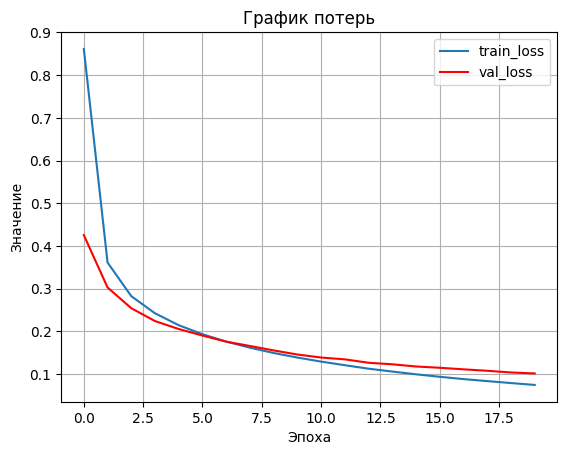

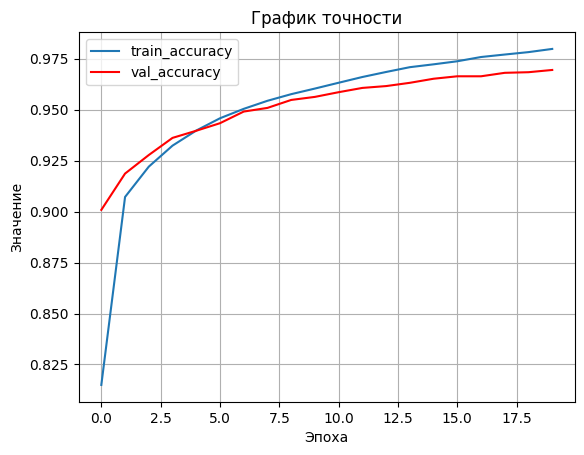

In [ ]:
model = Sequential()
model.add(Dense(64,input_dim = num_pixels,activation = 'sigmoid'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train,y_train, validation_data = (X_test, y_test),epochs = 20, batch_size = 200, verbose = 0)
history_df = pd.DataFrame(history.history)
history_df
ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.861302,0.814983,0.425401,0.9008
1,0.361272,0.907133,0.302838,0.9186
2,0.282510,0.922000,0.254318,0.9277
3,0.242359,0.932300,0.224160,0.9361
4,0.214539,0.939700,0.205555,0.9396
5,0.193402,0.945717,0.190335,0.9433
6,0.176038,0.950333,0.176126,0.9490
7,0.161903,0.954283,0.165883,0.9508
8,0.149508,0.957533,0.155489,0.9547
9,0.138788,0.960283,0.145909,0.9562


По данному графику и истории видно, что данная модель более точно предсказывает значения, на что указывает значения val_loss и val_accuracy и положения графика

# **Модель №1**

Количество слоёв было увеличено на 1, количество нейронов было уменьшено. Количество эпох - 40

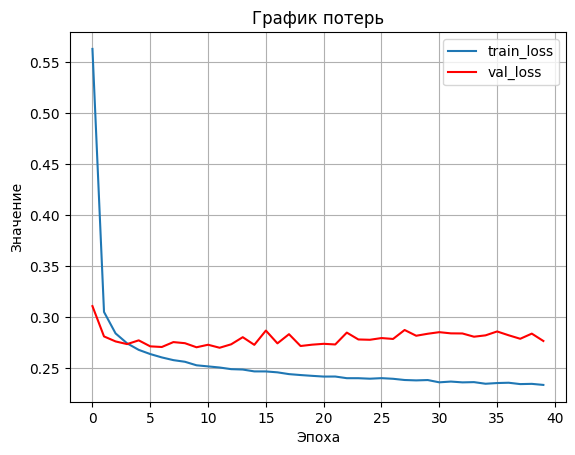

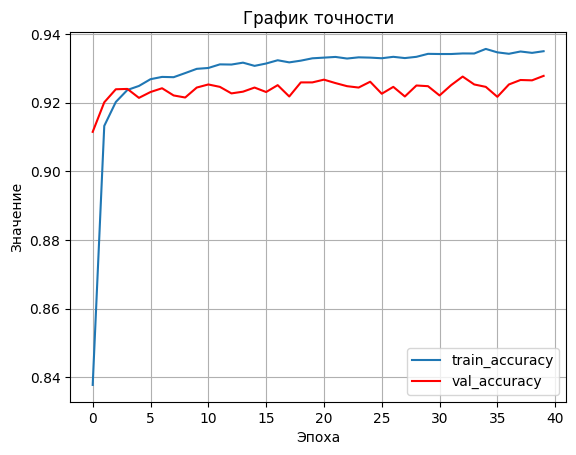

In [ ]:
model = Sequential()
model.add(Dense(32,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(16,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train,y_train, validation_data = (X_test, y_test),epochs = 40, batch_size = 200, verbose = 0)
history_df = pd.DataFrame(history.history)
history_df
ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.563076,0.837800,0.310867,0.9115
1,0.305150,0.913233,0.281145,0.9201
2,0.284102,0.920200,0.276235,0.9239
3,0.274359,0.923700,0.273612,0.9240
4,0.267970,0.924867,0.277295,0.9214
5,0.263856,0.926833,0.271407,0.9231
6,0.260557,0.927500,0.270783,0.9242
7,0.257899,0.927417,0.275587,0.9221
8,0.256290,0.928617,0.274511,0.9215
9,0.252839,0.929850,0.270507,0.9244


В сравнении с моделью с функцией активации linear и с двумя слоями, данная модель обладает чуть более лучшими значениями потерь и точности (отличие в сотых долях)

# **Модель №2**

В данной модели было увеличено количество слоёв на 1, количество также было увеличено.

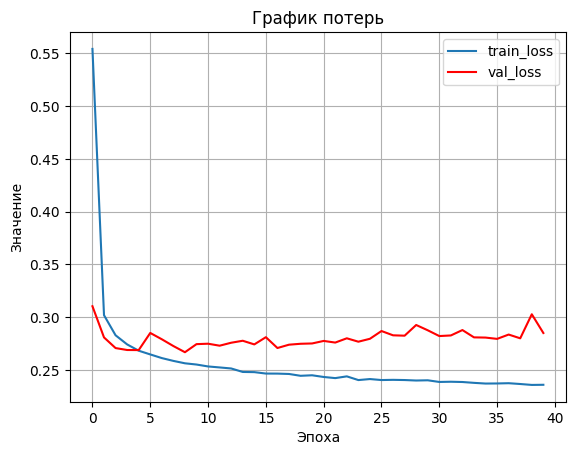

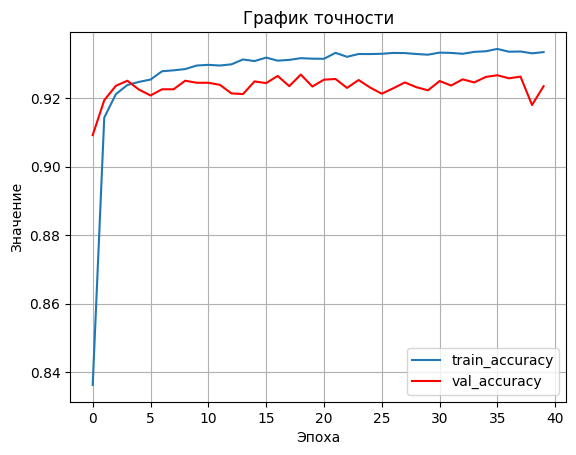

In [ ]:
model = Sequential()
model.add(Dense(30,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(20,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(16,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train,y_train, validation_data = (X_test, y_test),epochs = 40, batch_size = 200, verbose = 0)
history_df = pd.DataFrame(history.history)
history_df
ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.554293,0.836267,0.310416,0.9092
1,0.301938,0.914333,0.280852,0.9194
2,0.282890,0.921167,0.270773,0.9236
3,0.274244,0.923850,0.268936,0.9251
4,0.268270,0.924750,0.268848,0.9225
5,0.264746,0.925433,0.285100,0.9208
6,0.261283,0.927867,0.279111,0.9226
7,0.258610,0.928133,0.272692,0.9226
8,0.256335,0.928500,0.266841,0.9251
9,0.255168,0.929533,0.274498,0.9245


Значения потерь и точности данной модели примерно такие же как и у предыдущей

# **Модель №3**

Был добавлен 1 слой и были добавлены нейроны.

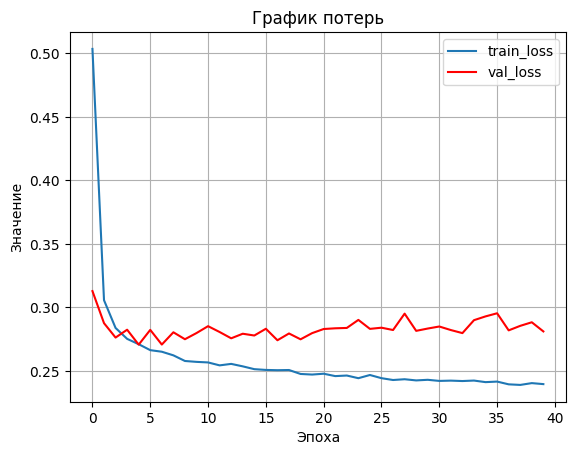

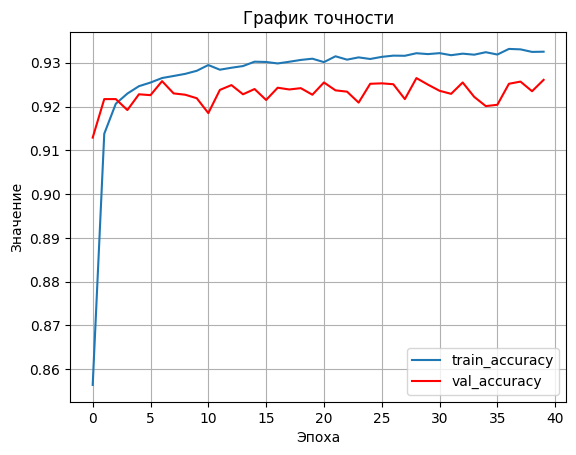

In [ ]:
model = Sequential()
model.add(Dense(40,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(30,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(20,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(16,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train,y_train, validation_data = (X_test, y_test),epochs = 40, batch_size = 200, verbose = 0)
history_df = pd.DataFrame(history.history)
history_df
ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.503425,0.856383,0.312789,0.9129
1,0.305629,0.913783,0.287546,0.9217
2,0.283771,0.920650,0.276213,0.9217
3,0.275190,0.922967,0.282390,0.9192
4,0.270979,0.924650,0.270635,0.9228
5,0.266301,0.925483,0.282259,0.9226
6,0.265062,0.926517,0.270700,0.9258
7,0.262215,0.926983,0.280368,0.9230
8,0.257774,0.927467,0.274903,0.9227
9,0.257077,0.928167,0.279758,0.9219


# **Модель №4**

Был добавлен один слой и дополнительные нейроны.

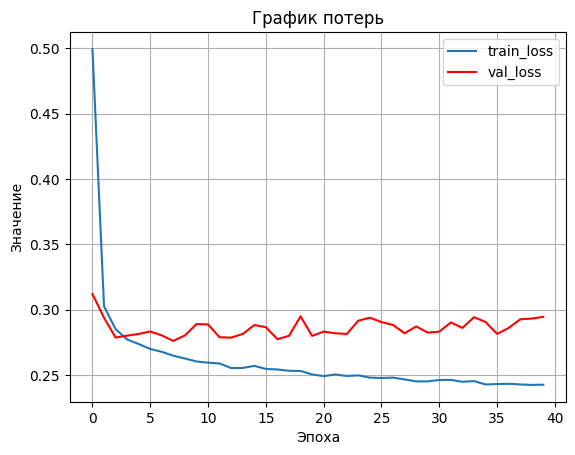

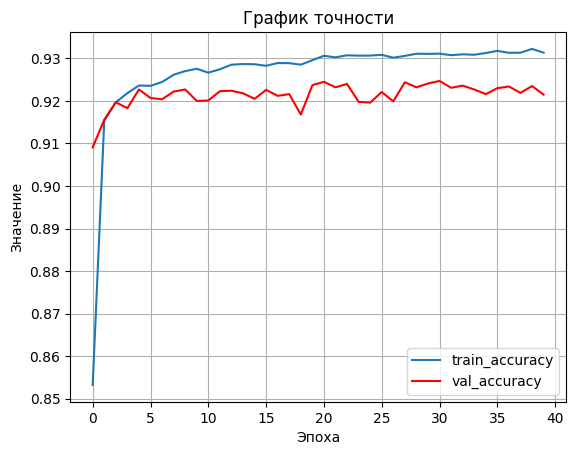

In [ ]:
model = Sequential()
model.add(Dense(50,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(40,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(30,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(20,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(16,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train,y_train, validation_data = (X_test, y_test),epochs = 40, batch_size = 200, verbose = 0)
history_df = pd.DataFrame(history.history)

ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.499407,0.853233,0.311965,0.9091
1,0.302670,0.915350,0.293894,0.9156
2,0.285150,0.919700,0.278693,0.9197
3,0.277228,0.921833,0.280194,0.9183
4,0.273772,0.923633,0.281470,0.9227
5,0.269980,0.923550,0.283343,0.9207
6,0.267789,0.924450,0.280344,0.9204
7,0.264801,0.926167,0.276146,0.9222
8,0.262683,0.927017,0.280348,0.9227
9,0.260423,0.927567,0.288976,0.9200


# **Модель №5**

Был добавлен один слой и дополнительные нейроны

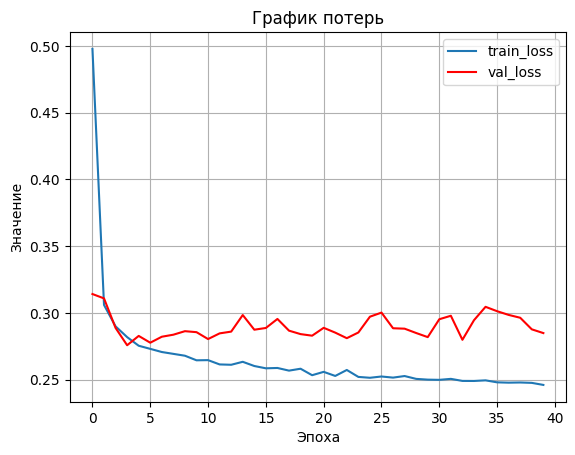

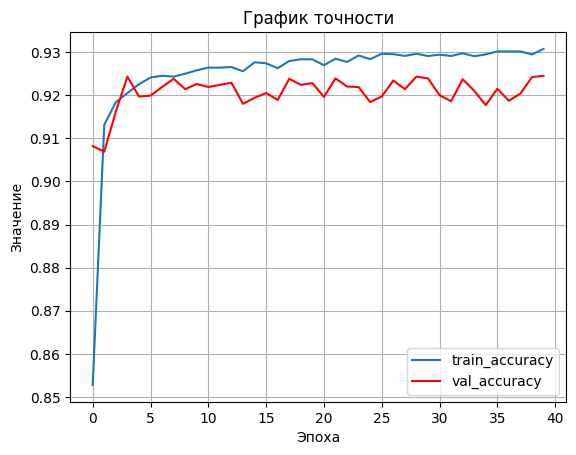

In [ ]:
model = Sequential()
model.add(Dense(60,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(50,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(40,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(30,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(20,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(16,input_dim = num_pixels,activation = 'linear'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train,y_train, validation_data = (X_test, y_test),epochs = 40, batch_size = 200, verbose = 0)
history_df = pd.DataFrame(history.history)

ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.497701,0.852800,0.314164,0.9082
1,0.305990,0.913133,0.310910,0.9069
2,0.289953,0.918383,0.288780,0.9162
3,0.281909,0.920483,0.275825,0.9243
4,0.275446,0.922533,0.282809,0.9197
5,0.273108,0.924100,0.277722,0.9199
6,0.270749,0.924517,0.282196,0.9219
7,0.269363,0.924300,0.283721,0.9238
8,0.267972,0.924983,0.286351,0.9214
9,0.264541,0.925767,0.285612,0.9226


По данным моделям можно сделать вывод о том, что при добавлении слоёв и увеличении количества нейронов на данных входных данных сложно добиться значительных изменений в качестве предсказывания, возможно, стоит изменить другие параметры модели для достижения наилучшей производительности

# **Сверточная нейронная сеть №1**

Была создана, скомпилированна и обучена сверточная нейронная сеть, содержащая в себе 1 сверточный слой с размером 3x3, 1 слой пулинга с размером 2x2, 1 слой дропаут с параметром 0.25, полносвязный слой с 128 нейронами и функцией активации relu, также выходной слой с функцией активации softmax

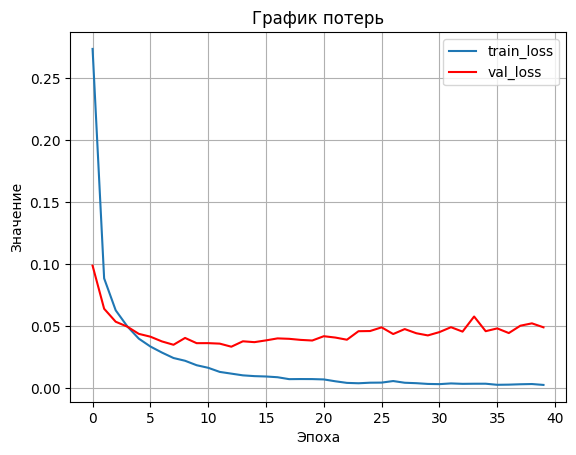

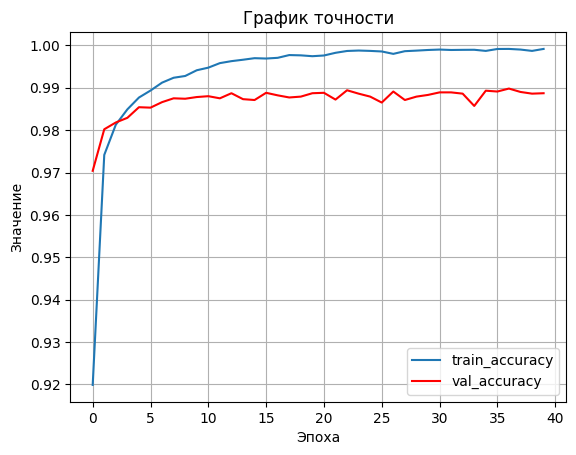

In [ ]:
# Создание сверточной нейронной сети
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# Компиляция
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40,
batch_size=200, verbose=0)
history_df = pd.DataFrame(history.history)
#
ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.273692,0.919900,0.098745,0.9704
1,0.088493,0.974150,0.063952,0.9802
2,0.062698,0.981283,0.053476,0.9818
3,0.049781,0.984900,0.049523,0.9829
4,0.039811,0.987683,0.043678,0.9854
5,0.033482,0.989333,0.041412,0.9853
6,0.028586,0.991200,0.037577,0.9866
7,0.024189,0.992350,0.034877,0.9875
8,0.021971,0.992767,0.040396,0.9874
9,0.018372,0.994117,0.036167,0.9878


Данная модель предсказывает значения более точно в сравнении с полносвязной моделью.

# **Сверточная нейронная сеть №2**

Данная модель обладает 3 сверточными слоями, 2 слоями пуллинга и одним слоем дропаут. Полносвязные слои такие же, как и в предыдущей модели.

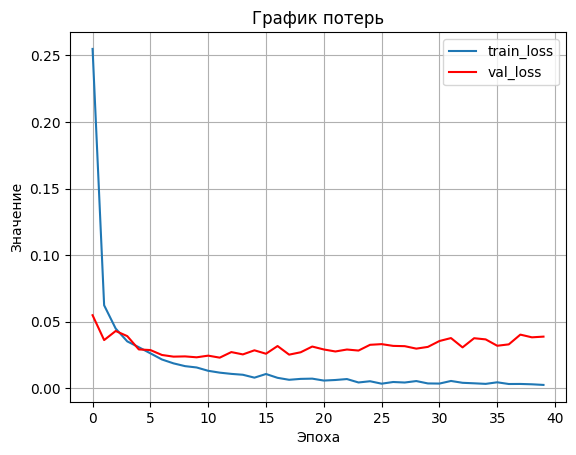

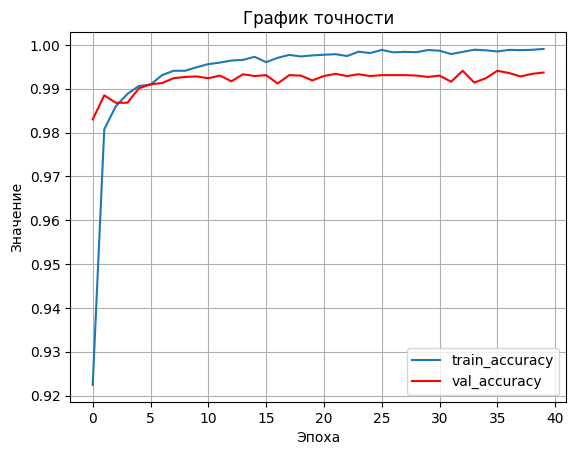

In [ ]:
# Создание сверточной нейронной сети
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1))) # слой свертки с 32 фильтрами размером 3 на 3, функция активации релу
model.add(MaxPooling2D(pool_size=(2, 2))) # слой подвыборки (уменьшает размерность карт чтобы уменьшить кол-во параметров)
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Dropout(0.25)) # выпадение 25% нейронов чтобы не было переобучения
model.add(Flatten())# выравниваение данных перед подачей на полносвязный слой потому что следующзий слой ожидает вектор
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# Компиляция
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40,
batch_size=200, verbose=0)
history_df = pd.DataFrame(history.history)
#
ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.254752,0.922433,0.054928,0.9830
1,0.062385,0.980750,0.036272,0.9885
2,0.044901,0.986000,0.043088,0.9868
3,0.035293,0.988817,0.039250,0.9868
4,0.030918,0.990633,0.029256,0.9901
5,0.026332,0.990950,0.028790,0.9910
6,0.021711,0.993100,0.025095,0.9913
7,0.018801,0.994100,0.023845,0.9924
8,0.016714,0.994100,0.024030,0.9927
9,0.015717,0.994917,0.023351,0.9928


Данная модель предсказывает значения точнее, чем предыдущая.

# **Выводы**

На основе полученных графиков и таблицы можно сделать следующие выводы:



*   Наилучшие результаты показали сверточные нейронные сети.
*   Наилучший показатель у сверточной нейронной сети с более сложной структурой


*   При одинаково количестве эпох = 40 наилучший результат показывали самые сложные нейронные сети
*   Функция активации sigmoid показала лучшие результаты в сравнении с функцией активации linear





# **Рукописные**

Было создано два собственных изображения рукописной цифры, загружены в программу и проверен результат предсказания лучшей модели.

Для реализации данной задачи была написана функция, предобрабатывающая изображения для работы с нейронной сетью

In [ ]:
def refactor_image(path):
    img = Image.open(path)
    img = img.resize((28, 28)) # т.к. выбрана модель CNN, то преобразуем размер на подходящий
    img = img.convert('L') # преобразования изображения в оттенки серого
    img_arr = np.array(img) # т.к. изображение в нейронной сети воспринимается как набор чисел, то его необходимо преобразовать в Np.array для дальнейшей работы с ним
    img_arr = np.expand_dims(img_arr, axis=0) # добавляем размерность для работы с CNN
    return img_arr



In [ ]:
# Создание сверточной нейронной сети
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1))) # слой свертки с 32 фильтрами размером 3 на 3, функция активации релу
model.add(MaxPooling2D(pool_size=(2, 2))) # слой подвыборки (уменьшает размерность карт чтобы уменьшить кол-во параметров)
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Dropout(0.25)) # выпадение 25% нейронов чтобы не было переобучения
model.add(Flatten())# выравниваение данных перед подачей на полносвязный слой потому что следующзий слой ожидает вектор
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# Компиляция
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40,
batch_size=200, verbose=0)

На основе данных изображений были выполнены предсказания

In [ ]:
# загрузка

one = refactor_image('1_1.png')
two = refactor_image('2_1.png')
three = refactor_image('3_1.png')
four = refactor_image('4_1.png')
seven = refactor_image('7_1.png')
eight = refactor_image('8_1.png')

# предсказание для единицы
prediction_one = model.predict(one)
print(prediction_one)
index_one = np.argmax(prediction_one) # выбираем класс с наибольшей вероятностью
print("Первое изображение - ",index_one)
print("Написано было - 1")

# предсказание для двойки

prediction_two = model.predict(two)
print(prediction_two)
index_two = np.argmax(prediction_two) # выбираем класс с наибольшей вероятностью
print("Первое изображение - ",index_two)
print("Написано было - 2")


# предсказание для тройки
prediction_three = model.predict(three)
print(prediction_three)
index_three = np.argmax(prediction_three) # выбираем класс с наибольшей вероятностью
print("Первое изображение - ",index_three)
print("Написано было - 3")

# предсказание для четверки
prediction_four = model.predict(four)
print(prediction_four)
index_four = np.argmax(prediction_four) # выбираем класс с наибольшей вероятностью
print("Первое изображение - ",index_four)
print("Написано было - 4")

# предсказание для семерки
prediction_seven = model.predict(seven)
print(prediction_seven)
index_seven = np.argmax(prediction_seven) # выбираем класс с наибольшей вероятностью
print("Первое изображение - ",index_seven)
print("Написано было - 7")

# предсказание для восьмерки
prediction_eight = model.predict(eight)
print(prediction_eight)
index_eight = np.argmax(prediction_eight) # выбираем класс с наибольшей вероятностью
print("Первое изображение - ",index_eight)
print("Написано было - 8")

1/1 [==============================] - 0s 29ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Первое изображение -  8
Написано было - 1
1/1 [==============================] - 0s 29ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Первое изображение -  0
Написано было - 2
1/1 [==============================] - 0s 28ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Первое изображение -  4
Написано было - 3
1/1 [==============================] - 0s 29ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Первое изображение -  4
Написано было - 4
1/1 [==============================] - 0s 28ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Первое изображение -  7
Написано было - 7
1/1 [==============================] - 0s 29ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Первое изображение -  9
Написано было - 8


Данная модель правильно предсказала 2 значения (4 и 7), остальные были предсказаны неверно. Для вывода изображений их необходимо было привести к правильному формату.

In [ ]:
one = one.reshape(28,28)
three = three.reshape(28,28)
four = four.reshape(28,28)
two= two.reshape(28,28)
seven = seven.reshape(28,28)
eight = eight.reshape(28,28)

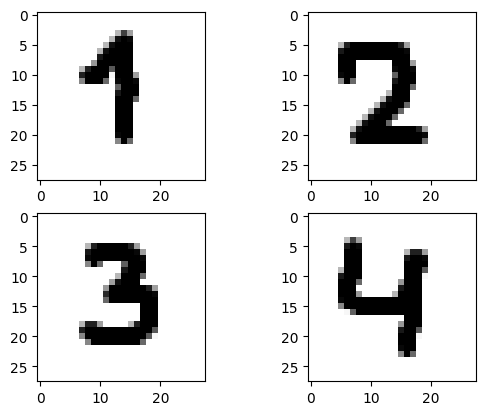

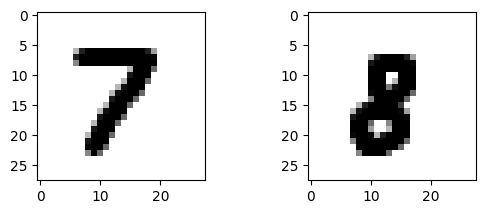

In [ ]:
plt.subplot(2,2,1)
plt.imshow(one,cmap=plt.get_cmap('gray'))

plt.subplot(2,2,2)
plt.imshow(two,cmap=plt.get_cmap('gray'))

plt.subplot(2,2,3)
plt.imshow(three,cmap=plt.get_cmap('gray'))

plt.subplot(2,2,4)
plt.imshow(four,cmap=plt.get_cmap('gray'))

plt.show()

plt.subplot(2,2,1)
plt.imshow(seven,cmap=plt.get_cmap('gray'))

plt.subplot(2,2,2)
plt.imshow(eight,cmap=plt.get_cmap('gray'))

plt.show()

# **Нейронная сеть для распознавания изображений набора данных CIFAR10**

Датасет CIFAR-10 состоит из 60000 цветных изображений размером 32x32, поделенных на 10 классов. В датасете 50000 тренировочных изображений и 10000 тестовых. В данном датасете присутствуют такие классы как: самолет, автомобиль, птица, кот, олень, собака, лягушка, лошадь, корабль, грузовик.

In [ ]:
# Загрузка и предобработка данных
(X_train,y_train),(X_test,y_test) = cifar10.load_data() # загрузка данных
X_train = X_train/255
X_test = X_test/255

170498071/170498071 [==============================] - 6s 0us/step


Примеры изображений были визуализированы

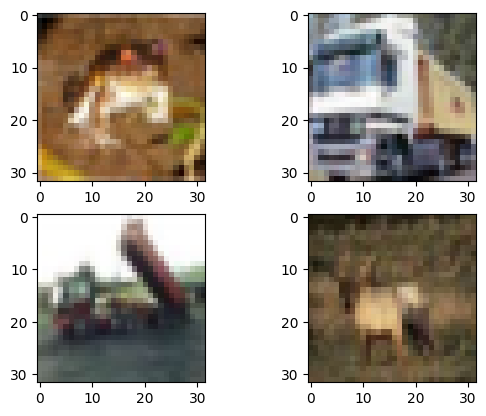

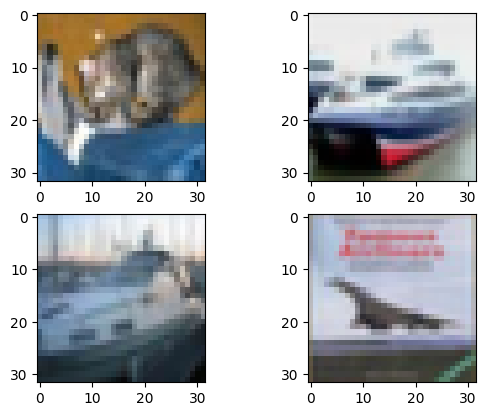

In [ ]:


plt.subplot(2,2,1)
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,2)
plt.imshow(X_train[1],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,3)
plt.imshow(X_train[2],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,4)
plt.imshow(X_train[3],cmap=plt.get_cmap('gray'))

plt.show()

plt.subplot(2,2,1)
plt.imshow(X_test[0],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,2)
plt.imshow(X_test[1],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,3)
plt.imshow(X_test[2],cmap=plt.get_cmap('gray'))

plt.subplot(2,2,4)
plt.imshow(X_test[3],cmap=plt.get_cmap('gray'))

plt.show()

Была создана модель с 3 сверточными слоями, двумя слоями подвыборки и с тремя слоями дропаута для избежания переобучения.

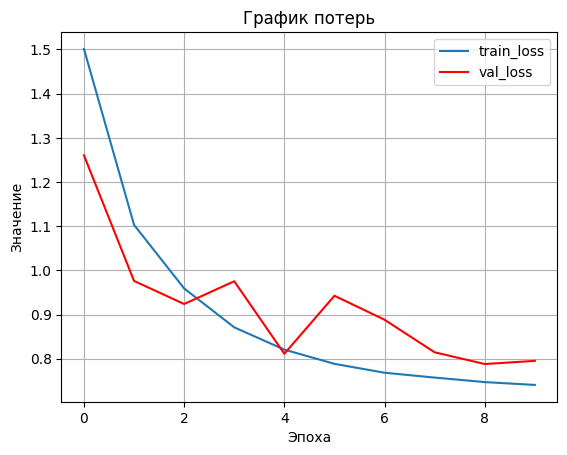

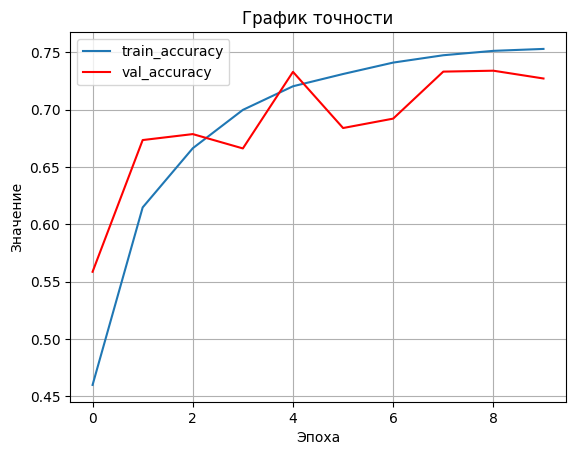

In [ ]:
# Создание сверточной нейронной сети
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32, 32, 3))) # слой свертки с 32 фильтрами размером 3 на 3, функция активации релу
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D()) # слой подвыборки
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D()) # слой подвыборки
model.add(Dropout(0.25))


model.add(Flatten())# выравниваение данных перед подачей на полносвязный слой

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

y_train = to_categorical(y_train) #преобразование правильных ответов в one-hotпредставление: векторы, в которыхединственная единица на месте нужной цифры
y_test = to_categorical(y_test)
# Компиляция
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)
history_df = pd.DataFrame(history.history)
#
ploting(history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,1.501208,0.45980,1.260371,0.5585
1,1.102926,0.61464,0.976039,0.6734
2,0.959071,0.66626,0.923831,0.6786
3,0.871017,0.69972,0.975284,0.6661
4,0.820562,0.72032,0.811151,0.7329
5,0.788373,0.73102,0.942521,0.6839
6,0.768231,0.74098,0.888157,0.6921
7,0.757297,0.74738,0.814493,0.7331
8,0.747085,0.75122,0.787960,0.7339
9,0.740670,0.75290,0.795082,0.7271


По данным графикам можно сделать вывод о том, что значения точности и потерь улучшаются с каждой эпохой до 8, после которой заметно "сглаживание" графика, по чему можно понять, что значения в дальнейшем будут примерно такие же